# Importing Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data Preperation

In [28]:
data = load_wine()
X = data.data
y_true = data.target
feature_names = data.feature_names

In [29]:
print(f"Dataset features: {feature_names}")
print(f"Shape of dataset: {X.shape}")

Dataset features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Shape of dataset: (178, 13)


In [45]:
# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering

In [31]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state =42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\furka\miniconda3\envs\coding01\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


## Plot the elbow curve

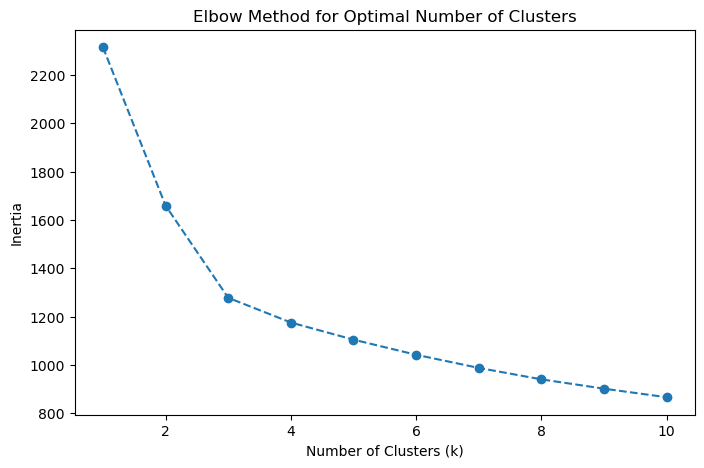

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker ='o', linestyle ='--')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

## Choosing the optimal number of clusters

In [33]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state =42)
y_kmeans = kmeans.fit_predict(X_scaled)

## Reducing dimensions for visualization using PCA

In [43]:
pca = PCA(n_components =13)
X_pca = pca.fit_transform(X_scaled)

## Plotting the clusters

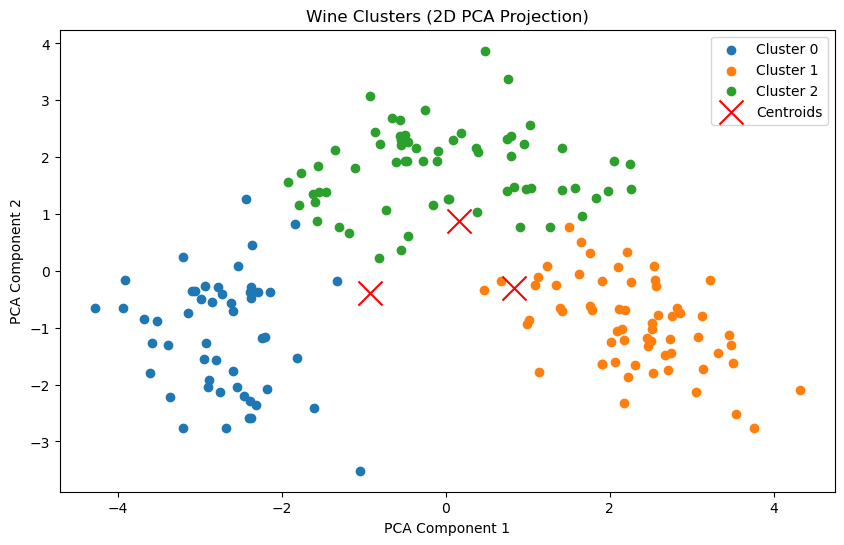

In [44]:
plt.figure(figsize=(10,6))
for i in range(optimal_k):
    plt.scatter(
        X_pca[y_kmeans == i,0],
        X_pca[y_kmeans == i,1],
        label = f"Cluster {i}"
    )
    
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s = 300,
    c = "red",
    marker ="x",
    label = "Centroids"
)

plt.title("Wine Clusters (2D PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()



In [17]:
# Compare clustering labels with true labels (optional)
from sklearn.metrics import accuracy_score, adjusted_rand_score
print(f"Adjusted Rand Index: {adjusted_rand_score(y_true, y_kmeans):.2f}")

Adjusted Rand Index: 0.90
